## Baseline Model

In [10]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

### Data Discover

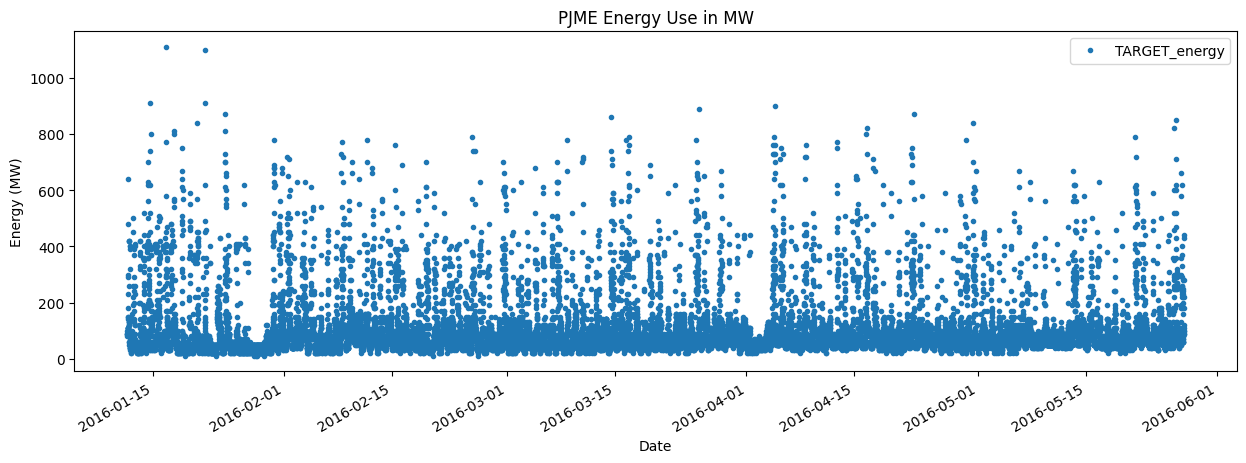

In [11]:
import pandas as pd

data = pd.read_csv("./UCI_data.csv")
import matplotlib.pyplot as plt
import seaborn as sns

data = data.set_index('date')
data.index = pd.to_datetime(data.index)

df_target = data[['TARGET_energy']]  # Double brackets to keep it as a DataFrame

df_target.plot(
    style='.',  # Dots for the plot
    figsize=(15, 5),  # Size of the plot
    color=sns.color_palette()[0],  # Color using seaborn's first palette color
    title='PJME Energy Use in MW'  # Title of the plot
)

plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Energy (MW)')  # Label for the y-axis
plt.show()

In [12]:
def create_features(df):
    """
    Create time series features based on the time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['weekofyear'] = df.index.isocalendar().week
    df['week_status'] = df['dayofweek'].apply(lambda x: 0 if x in [5, 6] else 1)
    return df

data = create_features(data)


data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour,dayofweek,month,weekofyear,week_status
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,38.330834,3.760707,24.988033,24.988033,101.496833,11.502002,2.977249,3.101647,11.393615,0.722726
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,11.794719,4.194648,14.496634,14.496634,104.380829,6.921953,1.985617,1.339200,5.657985,0.447664
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,1.000000,-6.600000,0.005322,0.005322,10.000000,0.000000,0.000000,1.000000,2.0,0.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,29.000000,0.900000,12.497889,12.497889,50.000000,6.000000,1.000000,2.000000,6.0,0.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,40.000000,3.433333,24.897653,24.897653,60.000000,12.000000,3.000000,3.000000,11.0,1.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,40.000000,6.566667,37.583769,37.583769,100.000000,17.000000,5.000000,4.000000,16.0,1.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,66.000000,15.500000,49.996530,49.996530,1110.000000,23.000000,6.000000,5.000000,21.0,1.000000


#### Outliers detection

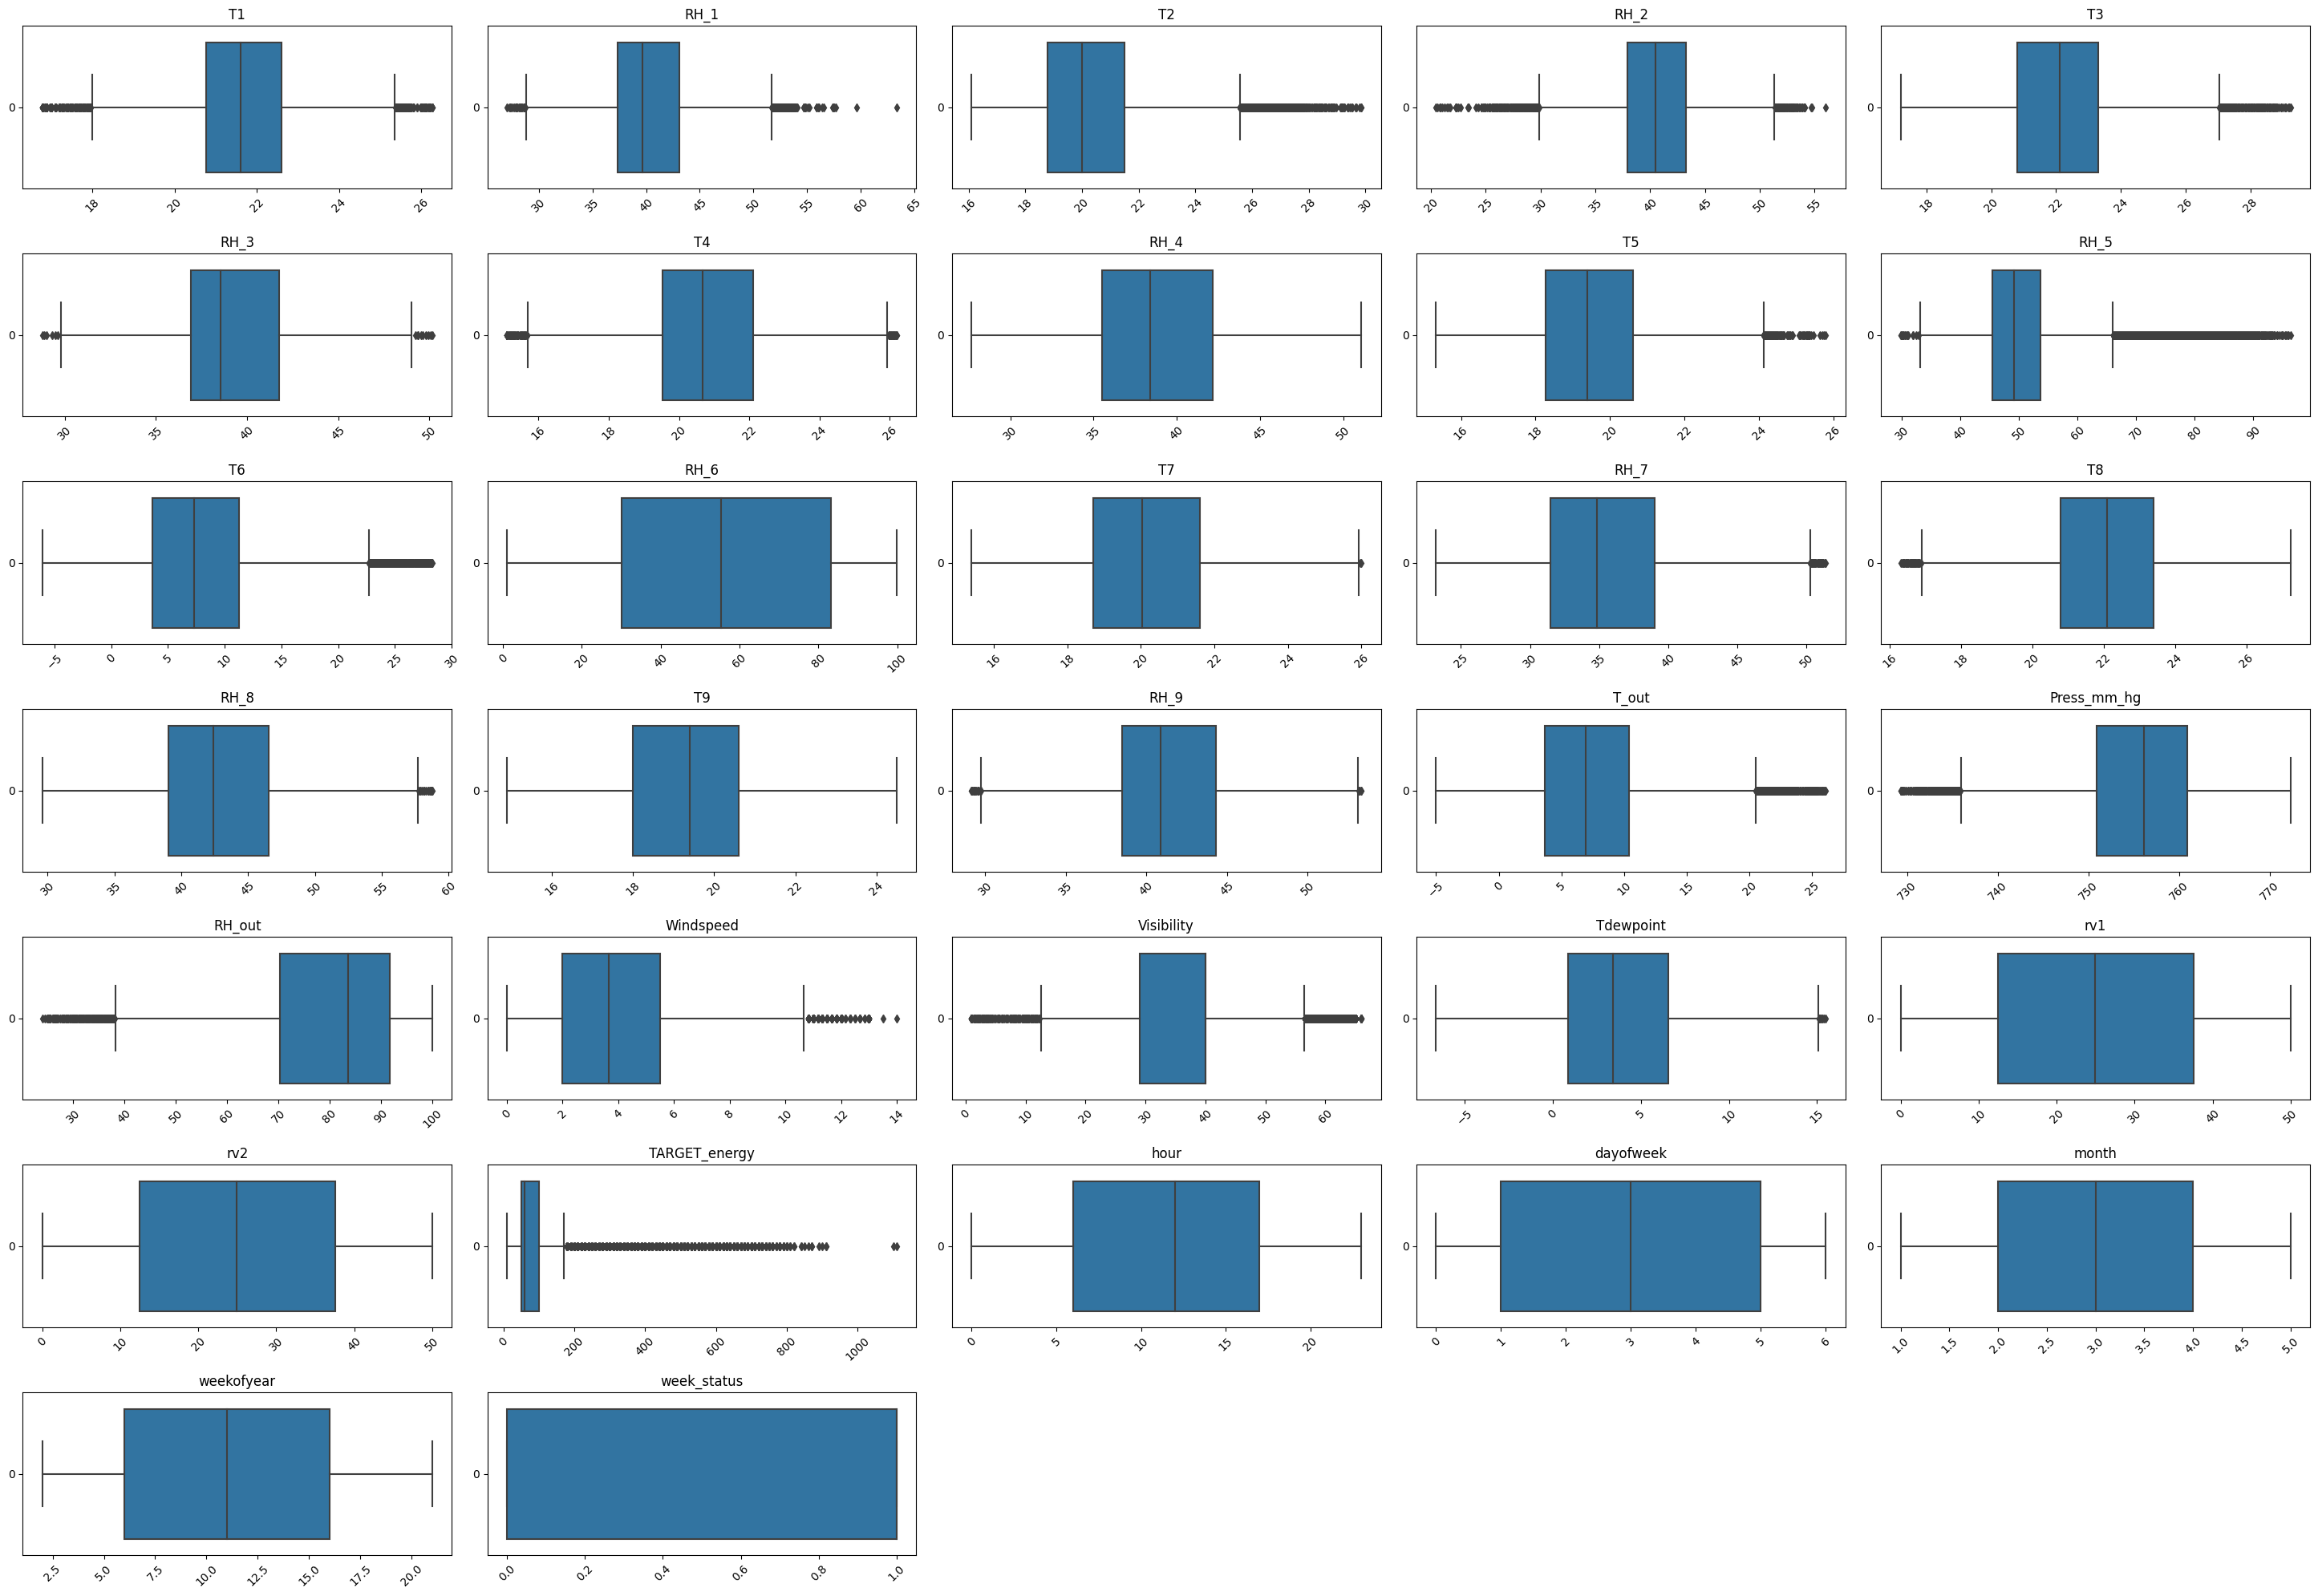

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


import math

num_cols = 5  
num_rows = math.ceil(len(data.columns) / num_cols) 

plt.figure(figsize=(29, 20))  # Set the figure size

# Iterate over the columns and create a separate box plot for each one
for i, column in enumerate(data.columns[:]):
    plt.subplot(num_rows, num_cols, i+1)  # Create subplots in the calculated grid
    sns.boxplot(data[column],orient='h')  # Plot box plot for the current column
    plt.title(column)  # Set the title as the column name
    plt.xticks(rotation=44)  # Rotate x-axis labels for better visualization

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



### overall data is pretty clean not much outliers

#### Correlation between target and features

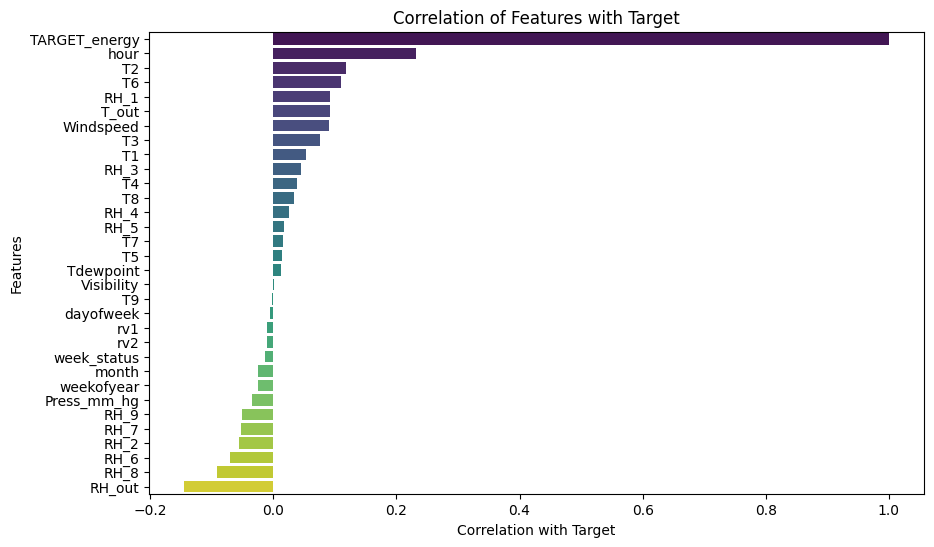

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation coefficients between features and target
correlation_matrix = data.corr()
target_correlation = correlation_matrix['TARGET_energy']  # Assuming 'Target' is the name of your target variable

# Sort correlation coefficients in descending order
target_correlation = target_correlation.sort_values(ascending=False)

# Visualize correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Correlation of Features with Target')
plt.show()



#### Data Skew check

/tmp/ipykernel_1759126/1315653070.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_1759126/1315653070.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


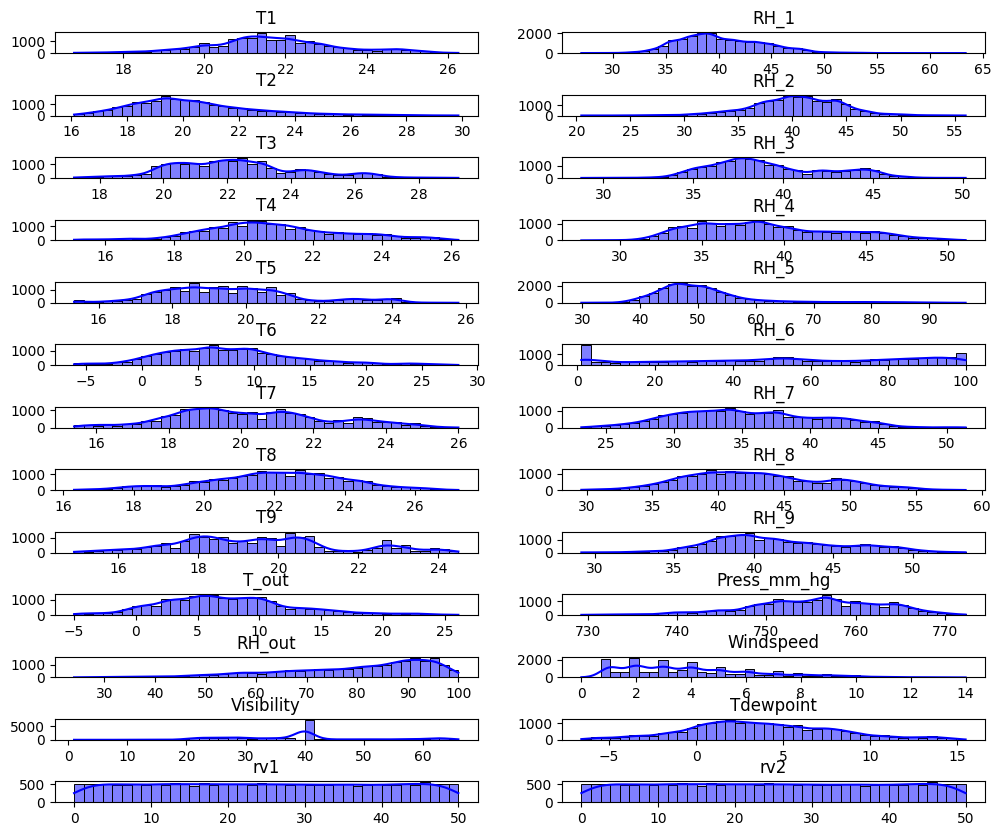

In [15]:

import matplotlib.pyplot as plt

columns = ["TARGET_energy"]
x = data.drop(columns=columns)
y = data['TARGET_energy']

numerical_columns = x.select_dtypes(include='number').columns[:26]

num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2  # Two columns of subplots
height_ratios = [1] * num_rows  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10), constrained_layout=True, gridspec_kw={'height_ratios': height_ratios, 'hspace': 2})

axes = axes.flatten()

# Plot histograms for each numerical feature
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, color='blue', bins=40, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')  
    axes[i].set_xlabel('') 

plt.tight_layout()

plt.show()

### Data Processing

#### Feature Scaling

In [16]:
#Tdewpoint, RH_out, windspeed, visibility

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer



X_train, X_holdout, y_train, y_holdout = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.1, random_state=42)

###Baseline model
columns_to_scale = ['Tdewpoint','RH_out','Windspeed','Visibility']



# Make copies of the data
# Robust scaling for selected columns
# Make copies of the data
X_train = X_train.copy()
X_test = X_test.copy()
X_val = X_val.copy()

# Robust scaling for selected columns
robust_scaler = StandardScaler().fit(X_train[columns_to_scale])
X_train[columns_to_scale] = robust_scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = robust_scaler.transform(X_test[columns_to_scale])
X_val[columns_to_scale] = robust_scaler.transform(X_val[columns_to_scale])

# Power transformation for selected columns
power_transformer = PowerTransformer(method='yeo-johnson').fit(X_train[columns_to_scale])
X_train[columns_to_scale] = power_transformer.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = power_transformer.transform(X_test[columns_to_scale])
X_val[columns_to_scale] = power_transformer.transform(X_val[columns_to_scale])

robust_scaler = StandardScaler().fit(X_train[columns_to_scale])
X_train[columns_to_scale] = robust_scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = robust_scaler.transform(X_test[columns_to_scale])
X_val[columns_to_scale] = robust_scaler.transform(X_val[columns_to_scale])



#### Scaled Data Visualization





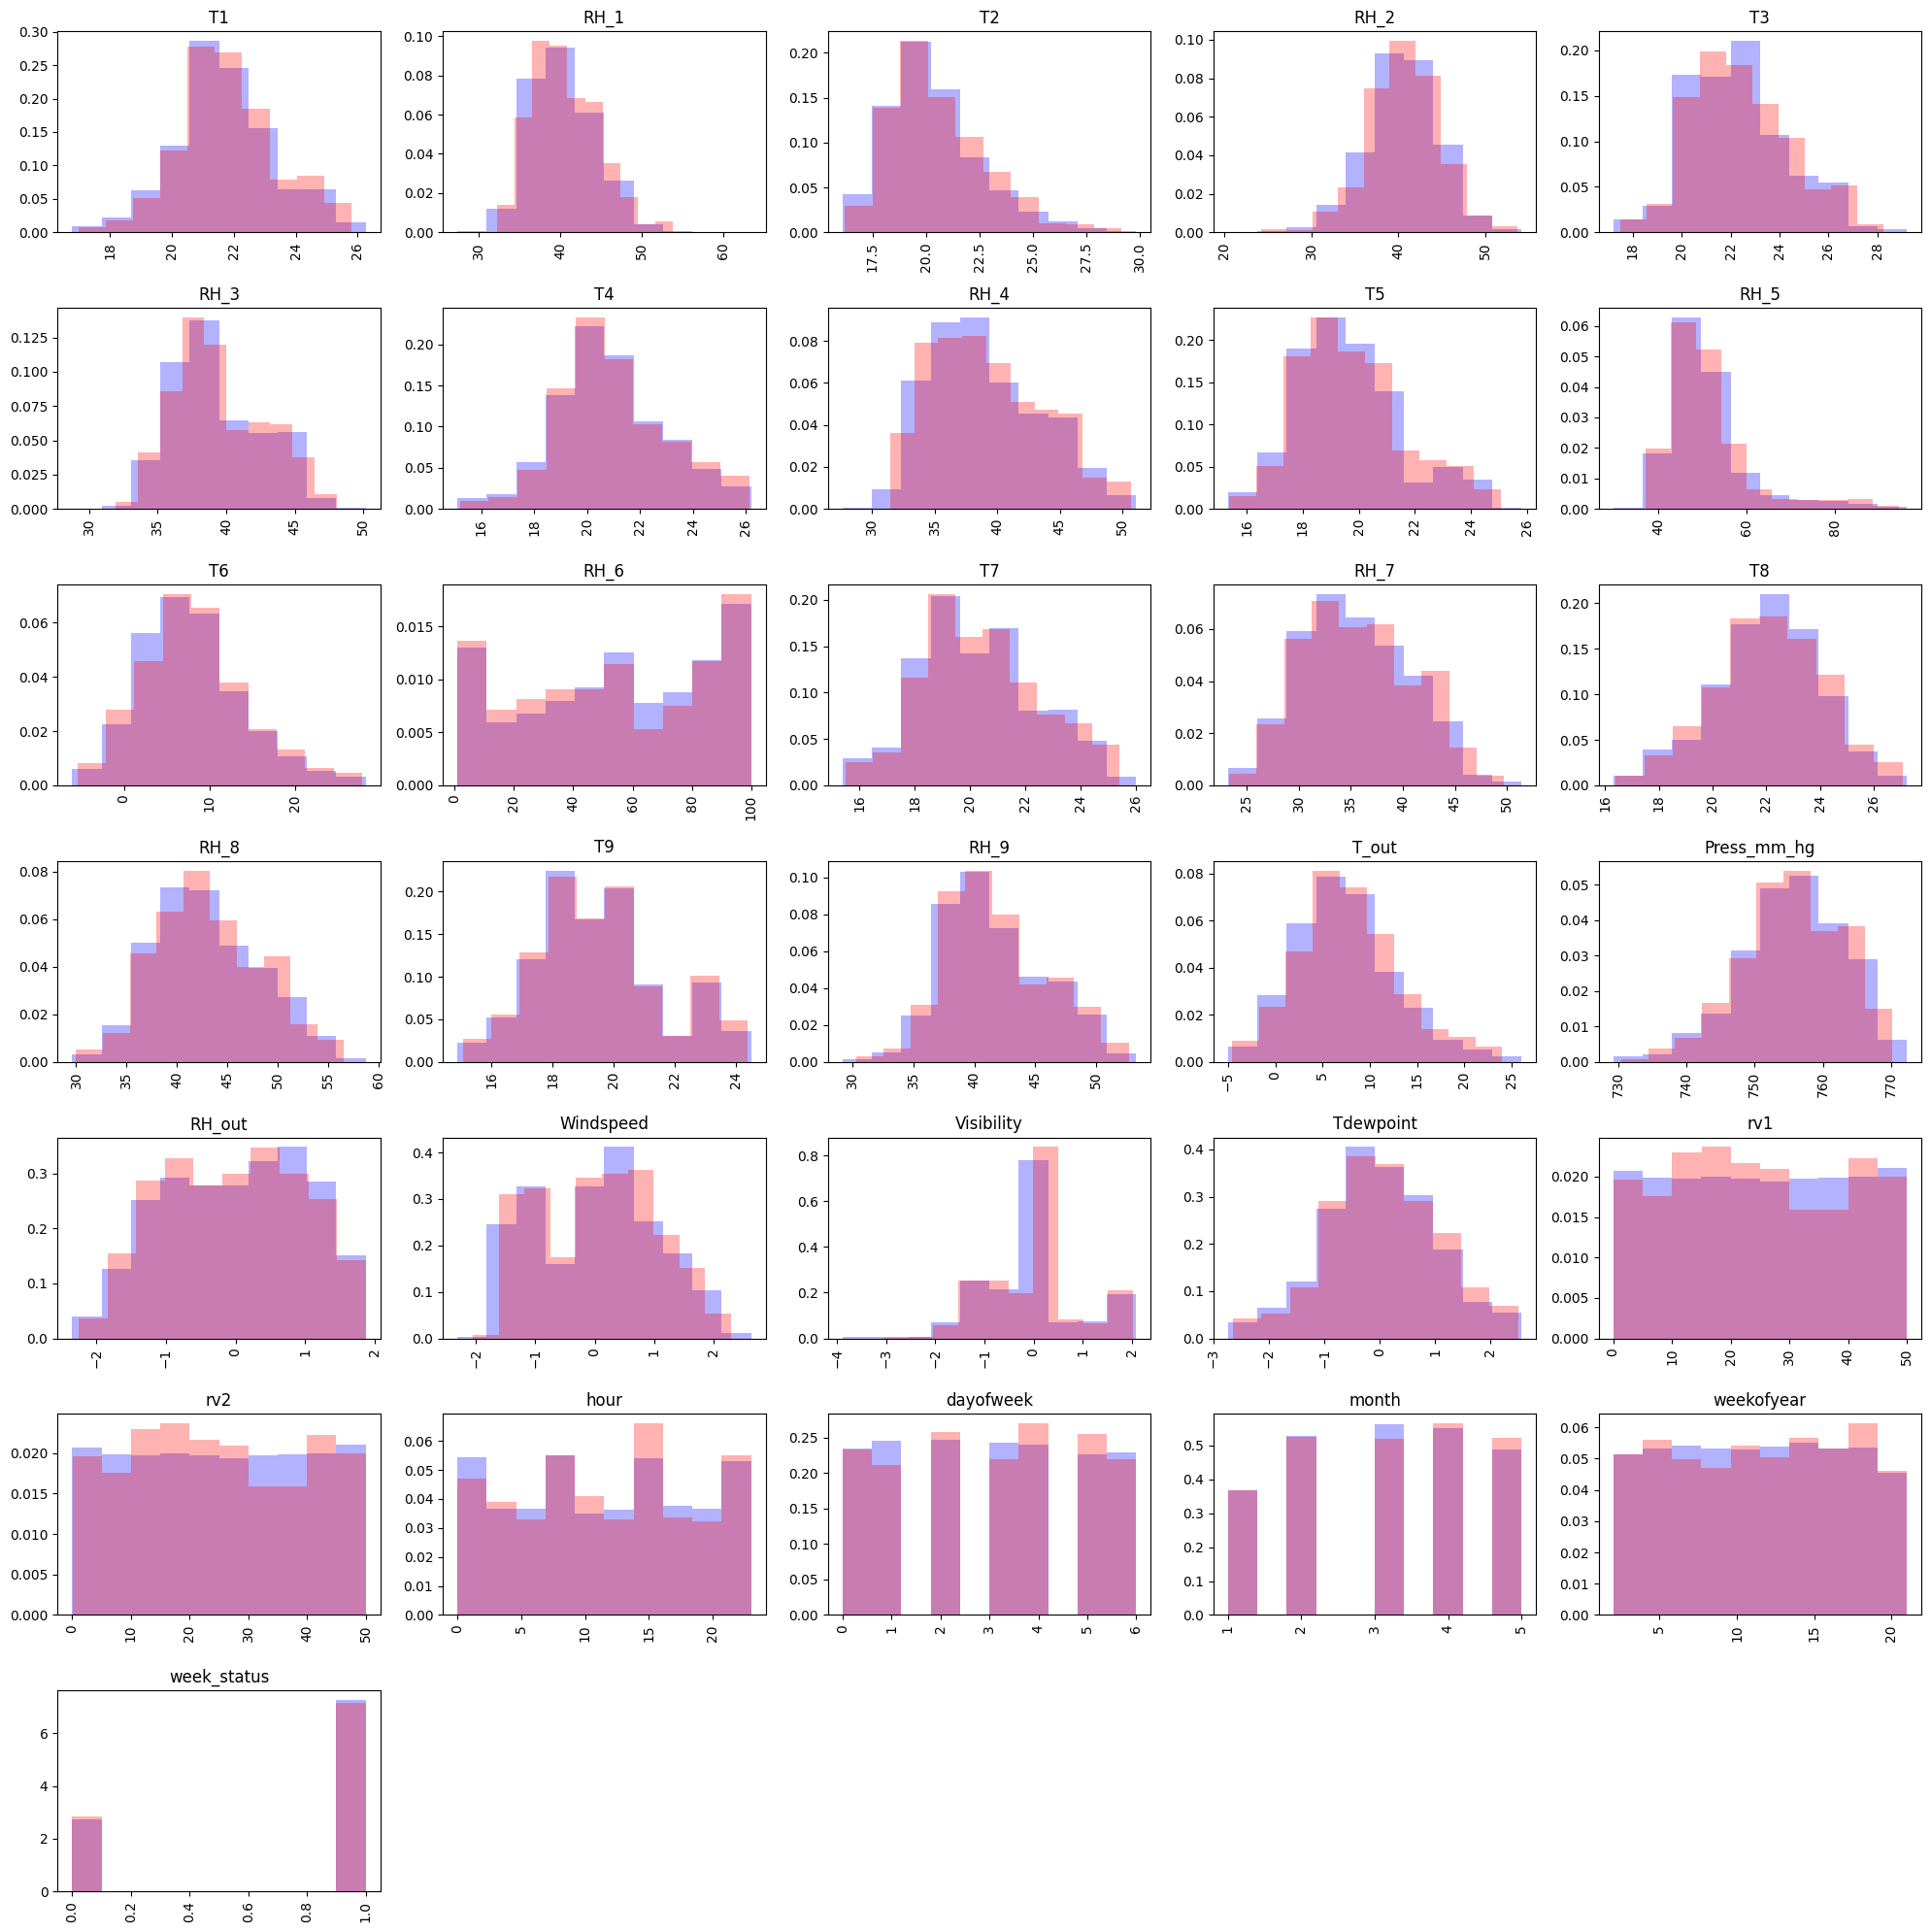

In [17]:

import matplotlib.pyplot as plt

num_rows = (X_train.shape[1] + 1) // 5 + 1 
num_cols = min(X_train.shape[1], 5)

# Create subplots with adjusted layout
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(X_train[col], alpha=0.3, color='b', density=True)
    plt.hist(X_test[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.tight_layout()  
plt.show()

### Data Modeling
#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


randomForest = RandomForestRegressor(n_estimators=300,random_state=42)

randomForest.fit(X_train,y_train)

y_pred_RF = randomForest.predict(X_val)

# Evaluate the model
rmse = mean_squared_error(y_val, y_pred_RF, squared=False)
r_squared = r2_score(y_val, y_pred_RF)

print("Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)

Root Mean Squared Error: 71.24984114359826
R-Squared: 0.5343758035573347


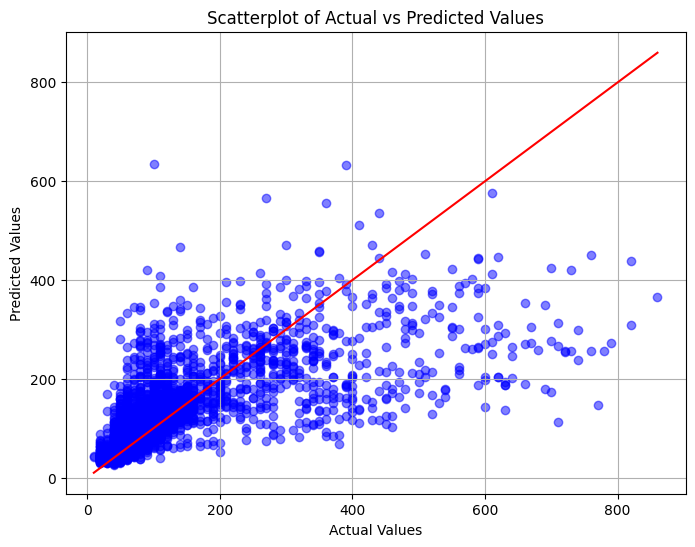

In [19]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_RF, color='blue', alpha=0.5)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
# Set plot labels and title
plt.title('Scatterplot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show plot
plt.grid(True)
plt.show()

#### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(random_state=42)
decisionTree.fit(X_train,y_train)

y_pred_DT = decisionTree.predict(X_val)

rmse = mean_squared_error(y_val,y_pred_DT,squared=False)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)

Root Mean Squared Error: 93.1240615568331
R-Squared: 0.5343758035573347


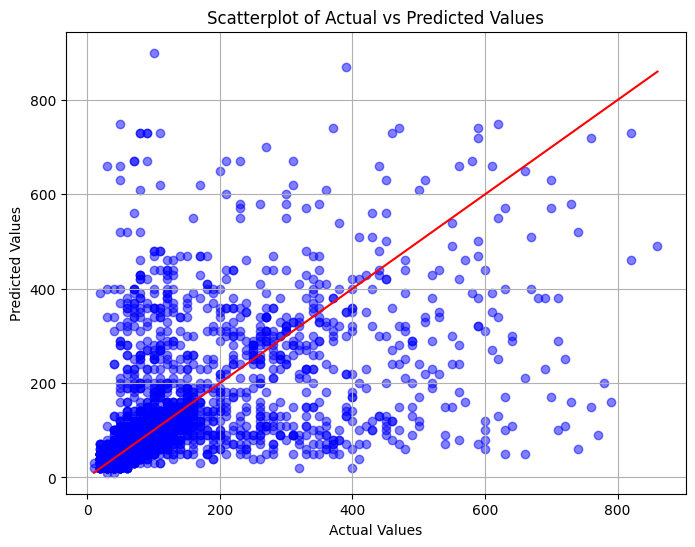

In [21]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_DT, color='blue', alpha=0.5)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')

# Set plot labels and title
plt.title('Scatterplot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show plot
plt.grid(True)
plt.show()

#### Polynomial Regression

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_val)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred_poly = model.predict(X_test_poly)

# Calculate Mean Squared Error
rmse = mean_squared_error(y_val, y_pred_poly, squared=False)
r_squared = r2_score(y_val, y_pred_poly)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)



Root Mean Squared Error: 87.20632752716644
R-Squared: 0.3024686439882176


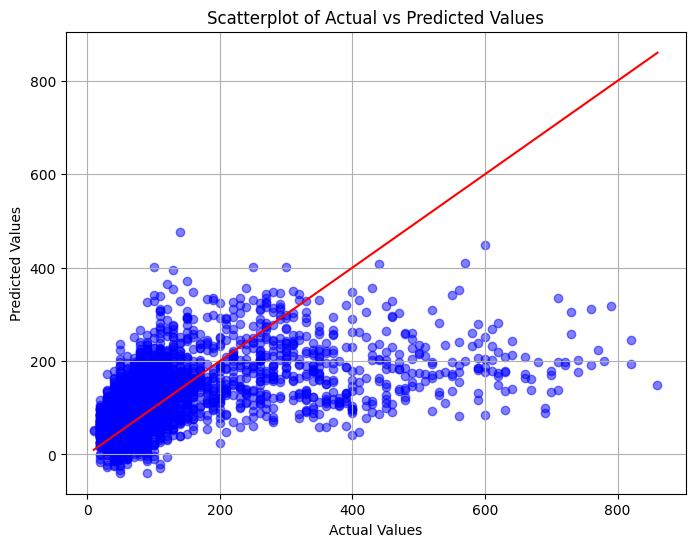

In [23]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_poly, color='blue', alpha=0.5)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')

# Set plot labels and title
plt.title('Scatterplot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show plot
plt.grid(True)
plt.show()

#### Neural Networks

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 25), solver='adam', max_iter=300, random_state=42)

# Train the MLP regressor on the training data
mlp_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred_mlp = mlp_regressor.predict(X_val)

# Evaluate the model using mean squared error
rmse = mean_squared_error(y_val, y_pred_mlp,squared=False)
r_squared = r2_score(y_val,y_pred_mlp)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)

Root Mean Squared Error: 94.03384564021397
R-Squared: 0.18897146444418644


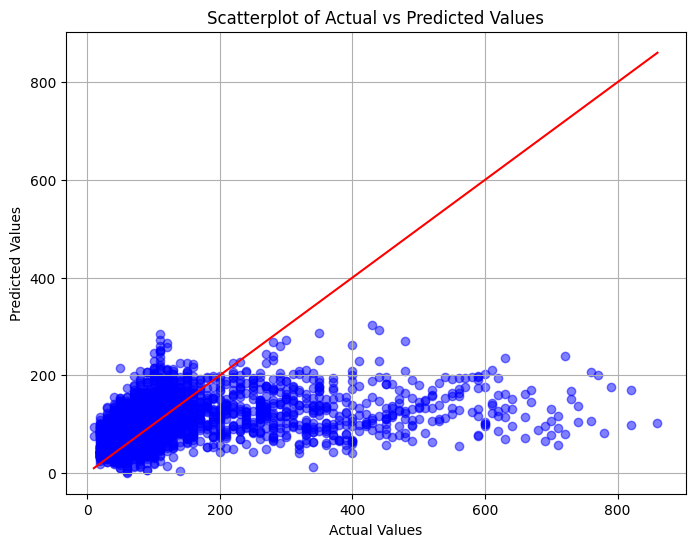

In [25]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_mlp, color='blue', alpha=0.5)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')

# Set plot labels and title
plt.title('Scatterplot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show plot
plt.grid(True)
plt.show()

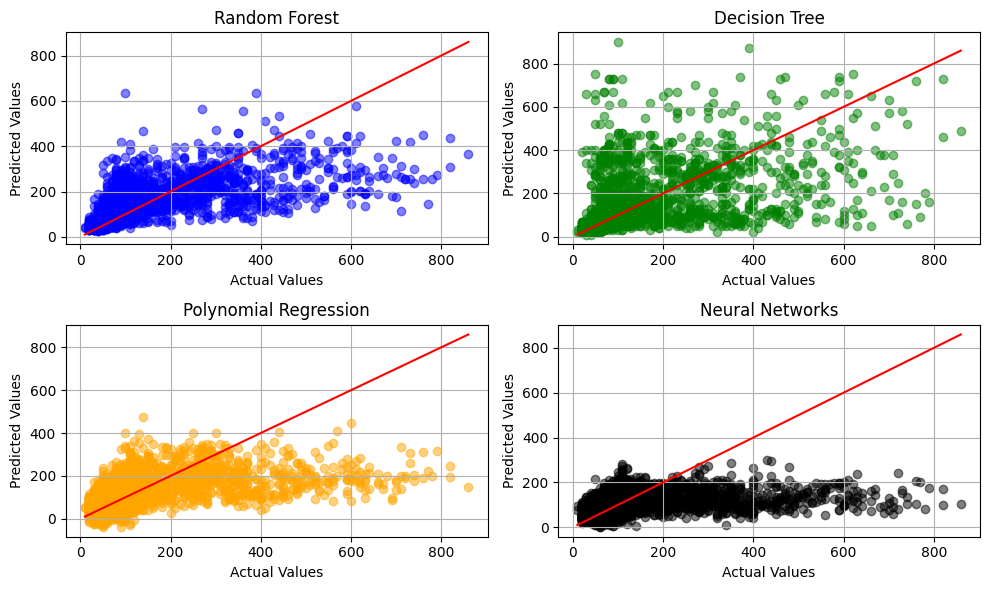

In [26]:
import matplotlib.pyplot as plt

# Create a figure with four subplots arranged in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Scatterplot 1
axs[0, 0].scatter(y_val, y_pred_RF, color='blue', alpha=0.5)
axs[0, 0].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
axs[0, 0].set_title('Random Forest')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Predicted Values')
axs[0, 0].grid(True)

# Scatterplot 2
axs[0, 1].scatter(y_val, y_pred_DT, color='green', alpha=0.5)  # Example, change color as needed
axs[0, 1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
axs[0, 1].set_title('Decision Tree')
axs[0, 1].set_xlabel('Actual Values')
axs[0, 1].set_ylabel('Predicted Values')
axs[0, 1].grid(True)

# Scatterplot 3
# Add more scatterplots as needed following the same pattern
axs[1, 0].scatter(y_val, y_pred_poly, color='orange', alpha=0.5)  # Example, change color as needed
axs[1, 0].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
axs[1, 0].set_title('Polynomial Regression')
axs[1, 0].set_xlabel('Actual Values')
axs[1, 0].set_ylabel('Predicted Values')
axs[1, 0].grid(True)

# Scatterplot 4
# Add more scatterplots as needed following the same pattern
axs[1, 1].scatter(y_val, y_pred_mlp, color='black', alpha=0.5)  # Example, change color as needed
axs[1, 1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
axs[1, 1].set_title('Neural Networks')
axs[1, 1].set_xlabel('Actual Values')
axs[1, 1].set_ylabel('Predicted Values')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()


### Hyperparameters Tuning and Regularization

#### Random Forest Tunning

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(random_state=42)

# Define parameter grid to search through
param_grid = {
    'n_estimators': [200,300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
}

# Define mean squared error as scoring metric

# Perform grid search with cross-validation
grid_search_rf_1 = GridSearchCV(rf_regressor, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_rf_1.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search_rf_1.best_params_
rf_best_estimator = grid_search_rf_1.best_estimator_

# Predict on the testing data using the best estimator
y_pred_rf = rf_best_estimator.predict(X_val)
r_squared = r2_score(y_val, y_pred_rf)

# Evaluate the model using mean squared error
rmse = mean_squared_error(y_val, y_pred_rf, squared=False)
print("Best Parameters:", best_params)
print("Root Mean Squared Error:", rmse)
print("r2_score", r_squared)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'max_depth': None, 'n_estimators': 300}
Root Mean Squared Error: 71.24984114359826
r2_score 0.5343758035573347


#### MLP Regressor Tunning

In [49]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search through
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


# Create an MLPRegressor
mlp_regressor = MLPRegressor(solver='adam',max_iter=100,random_state=42)

# Perform grid search with cross-validation
grid_search_mlp = GridSearchCV(mlp_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1,n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search_mlp.best_params_
mlp_best_estimator = grid_search_mlp.best_estimator_

# Predict on the testing data using the best estimator
y_pred_mlp = mlp_best_estimator.predict(X_val)

# Evaluate the model using mean squared error and R-squared
rmse = mean_squared_error(y_val, y_pred_mlp, squared=False)
r_squared = r2_score(y_val, y_pred_mlp)

print("Best Parameters:", best_params)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warning

Best Parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Root Mean Squared Error: 96.6489953188469
R-Squared: 0.14323359774042266


#### Decision Tree

In [50]:
from sklearn.model_selection import GridSearchCV
# Define the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define parameter grid to search through
param_grid_dt = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt',None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=10, scoring='neg_mean_squared_error', verbose=1,n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_dt = grid_search_dt.best_params_
ds_best_estimator = grid_search_dt.best_estimator_

# Predict on the testing data using the best estimator
y_pred_dt = ds_best_estimator.predict(X_val)

# Evaluate the model using mean squared error
rmse_dt = mean_squared_error(y_val, y_pred_dt, squared=False)
r_squared = r2_score(y_val, y_pred_dt)
print("Best Parameters for Decision Tree:", best_params_dt)
print("Decision Tree Root Mean Squared Error:", rmse_dt)
print("R-Squared:", r_squared)


Fitting 10 folds for each of 297 candidates, totalling 2970 fits


/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past 

Best Parameters for Decision Tree: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Root Mean Squared Error: 89.65150567946752
R-Squared: 0.26280409262606075


#### Advanced Random Forest

In [51]:
rf_regressor = RandomForestRegressor(max_depth=50,min_samples_split=2,min_samples_leaf=2,random_state=42)

# Define parameter grid to search through
param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_regressor, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search_rf.best_params_
rf_best_estimator = grid_search_rf.best_estimator_

# Predict on the testing data using the best estimator
y_pred_rf = rf_best_estimator.predict(X_val)

# Evaluate the model using mean squared error
rmse = mean_squared_error(y_val, y_pred_rf, squared=False)
print("Best Parameters:", best_params)
print("Decision Tree Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/wizburss/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

Best Parameters: {'max_features': 'auto', 'n_estimators': 200}
Decision Tree Root Mean Squared Error: 72.03791997181511
R-Squared: 0.26280409262606075


### Final Prediction

In [61]:
y_pred_rf_test = rf_best_estimator.predict(X_test)

# Evaluate the model using mean squared error and R-squared
rmse_test = mean_squared_error(y_test, y_pred_rf_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_rf_test)

# Print the results
print("Random Forest Final Prediction on Test Set")
print("Root Mean Squared Error on Test Set:", rmse_test)
print("R-Squared on Test Set:", r_squared_test)

Random Forest Final Prediction on Test Set
Root Mean Squared Error on Test Set: 66.50403342980091
R-Squared on Test Set: 0.6727676026055706
